In [111]:
#%pip install geopandas
#%pip install scikit-learn

In [112]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.cluster import KMeans
from datetime import datetime

### Step 1: Data Preparation

In [113]:
# Load the dataset
crime_data = pd.read_excel('D:\VIT\Data_Engeering\downloads\china_crime_sample_data_1000.xlsx')

In [114]:
crime_data.head()

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Unknown,27.490802,103.702659
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Unknown,39.014286,110.838019
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Unknown,34.639879,117.458917
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,NaN,23.120373,116.131223


In [115]:
# Data cleaning: Remove duplicates, handle missing values, and ensure date formatting
crime_data_cleaned = crime_data.drop_duplicates()
crime_data_cleaned.fillna(method='ffill', inplace=True)  # Fill missing values
crime_data_cleaned['Date'] = pd.to_datetime(crime_data_cleaned['Date'])  # Convert date to datetime


C:\Users\VISHRUT\AppData\Local\Temp\ipykernel_16784\2579493104.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crime_data_cleaned.fillna(method='ffill', inplace=True)  # Fill missing values


In [116]:
crime_data.sample(10)

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
939,1940,Fraud,Chongqing,2024-12-09,22:32,61,66,NaN,31.530330,101.541166
186,1187,Vandalism,Chongqing,2024-03-08,04:27,44,38,Unknown,36.344444,113.757714
101,1102,Fraud,Guangzhou,2024-02-06,02:25,32,40,Knife,32.728208,119.382053
595,1596,Fraud,Wuhan,2024-08-05,14:17,28,47,Bat,29.479233,111.567738
343,1344,Assault,Wuhan,2024-05-05,08:14,64,57,Unknown,28.677033,114.543381
395,1396,Vandalism,Guangzhou,2024-05-24,09:28,49,19,Knife,38.615147,116.577667
38,1039,Theft,Chongqing,2024-01-14,00:54,60,65,Gun,33.684661,101.307127
654,1655,Theft,Chengdu,2024-08-26,15:42,55,54,Knife,28.633191,101.752855
667,1668,Assault,Beijing,2024-08-31,16:00,34,46,Bat,23.213627,118.611904
221,1222,Burglary,Xi'an,2024-03-21,05:18,42,18,Knife,31.366172,103.021158


### Step 2: Exploratory Data Analysis (EDA)

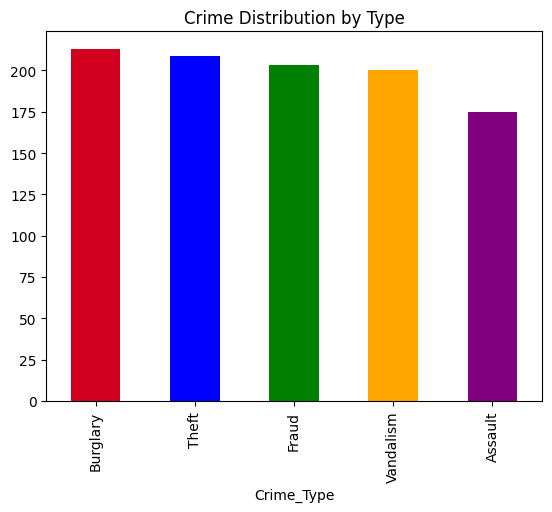

In [117]:
# 1. Crime distribution by type
crime_counts = crime_data_cleaned['Crime_Type'].value_counts()
colors = ['#d1001f', 'blue', 'green', 'orange', 'purple']
crime_counts.plot(kind='bar', title='Crime Distribution by Type', color=colors)
plt.show()


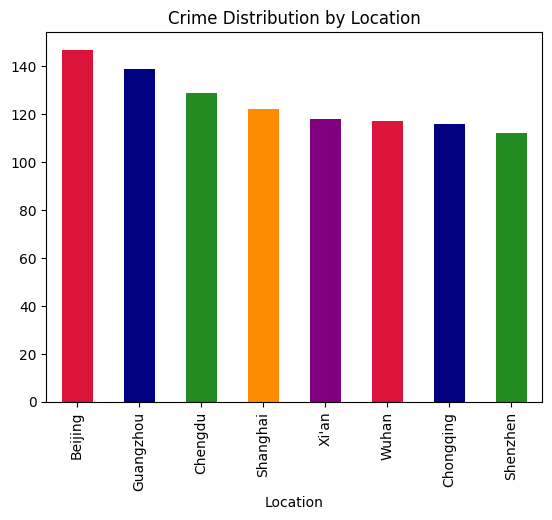

In [118]:
# 2. Crime distribution by location
location_counts = crime_data_cleaned['Location'].value_counts()
colors = ['crimson', 'navy', 'forestgreen', 'darkorange', 'purple']
location_counts.plot(kind='bar', title='Crime Distribution by Location', color=colors)
plt.show()

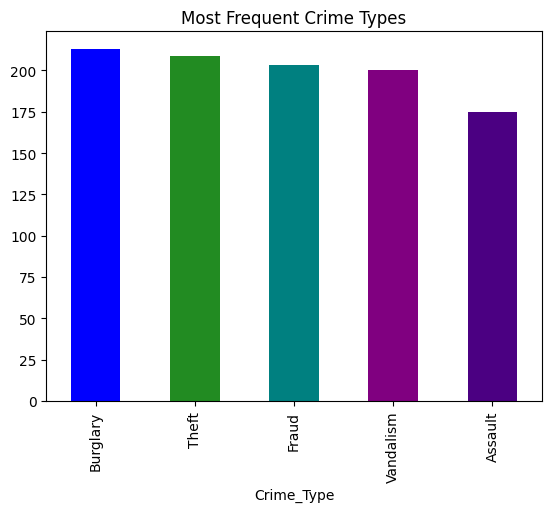

In [119]:
# Crime type frequency
crime_type_counts = crime_data_cleaned['Crime_Type'].value_counts()
colors = ['blue', 'forestgreen', 'teal', 'purple', 'indigo']
crime_type_counts.plot(kind='bar', title='Most Frequent Crime Types', color=colors)
plt.show()


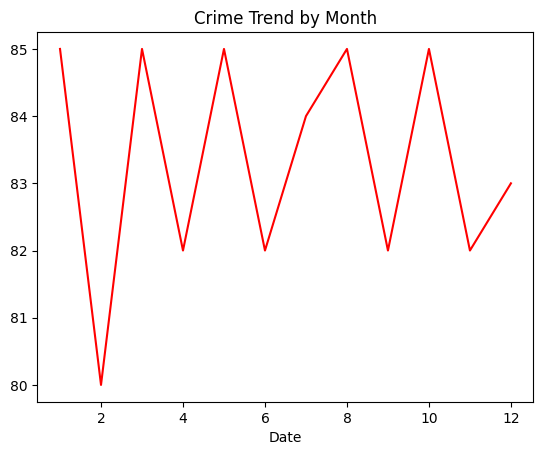

In [120]:
# 3. Crime trends by month
crime_trend_by_month = crime_data_cleaned.groupby(crime_data_cleaned['Date'].dt.month)['Crime_Type'].count()
crime_trend_by_month.plot(kind='line', title='Crime Trend by Month', color='red')
plt.show()

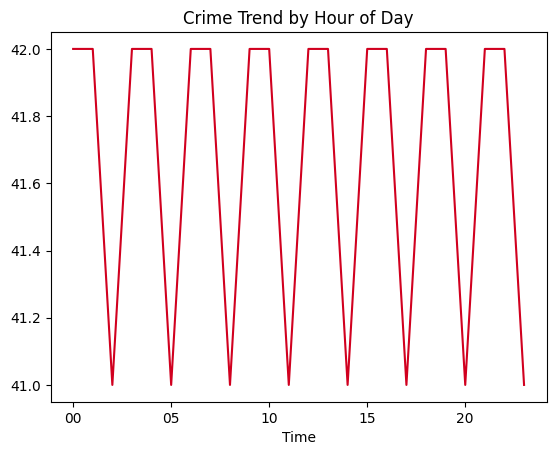

In [121]:
# 4. Crime trends by hour
crime_trend_by_hour = crime_data_cleaned.groupby(crime_data_cleaned['Time'].str[:2])['Crime_Type'].count()
crime_trend_by_hour.plot(kind='line', title='Crime Trend by Hour of Day', color='#d1001f')
plt.show()

In [122]:
# 5. Victim and suspect demographic analysis
victim_age_groups = pd.cut(crime_data_cleaned['Victim_Age'], bins=[0, 18, 35, 50, 65, 100])
suspect_age_groups = pd.cut(crime_data_cleaned['Suspect_Age'], bins=[0, 18, 35, 50, 65, 100])


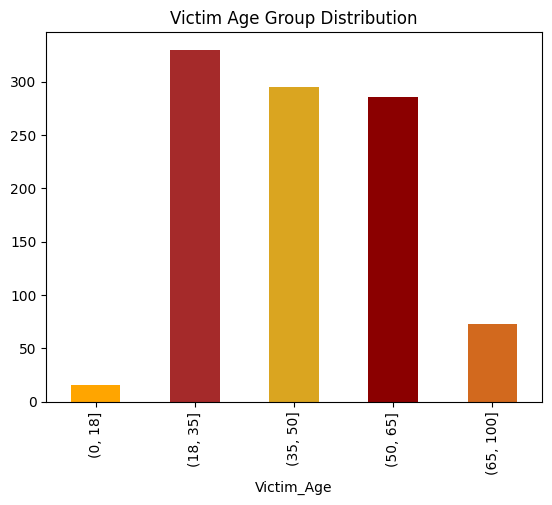

In [123]:
# Plot victim age groups
colors = ['orange', 'brown', 'goldenrod', 'darkred', 'chocolate']
victim_age_groups.value_counts().sort_index().plot(kind='bar', title='Victim Age Group Distribution', color=colors)
plt.show()

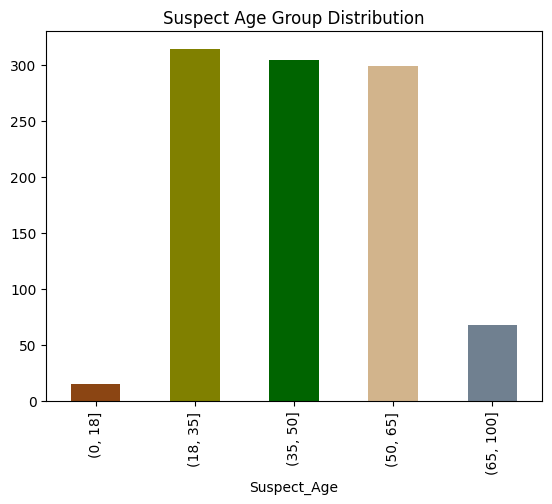

In [124]:
# Plot suspect age groups
colors = ['saddlebrown', 'olive', 'darkgreen', 'tan', 'slategray']

suspect_age_groups.value_counts().sort_index().plot(kind='bar', title='Suspect Age Group Distribution', color=colors)
plt.show()

### Step 3: Geospatial Analysis

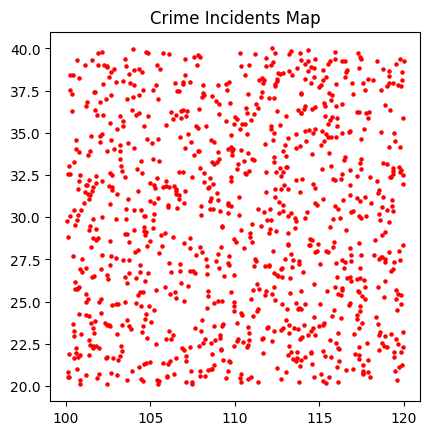

In [125]:
# Assuming the data contains latitude and longitude columns, plot incidents on the map
gdf = gpd.GeoDataFrame(crime_data_cleaned, geometry=gpd.points_from_xy(crime_data_cleaned.Longitude, crime_data_cleaned.Latitude))

# Plot the GeoDataFrame without the 'title' argument, and set the title using plt.title()
gdf.plot(marker='o', color='red', markersize=5)

# Set the title separately using plt.title()
plt.title('Crime Incidents Map')
plt.show()

<Axes: >

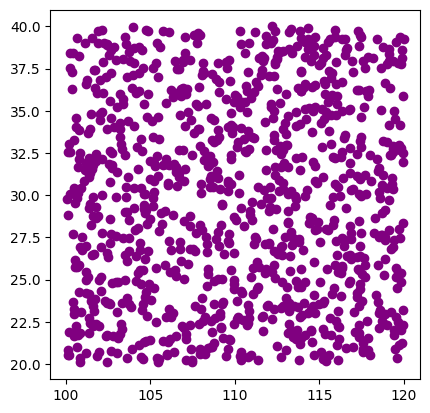

In [126]:
# visualize crime hotspots on maps and explore crime density

import geopandas as gpd
crime_data_cleaned['geometry'] = gpd.points_from_xy(crime_data_cleaned['Longitude'], crime_data_cleaned['Latitude'])
gdf = gpd.GeoDataFrame(crime_data_cleaned, geometry='geometry')
gdf.plot(color='purple')

### Step 4: Clustering Analysis (K-Means)

In [127]:
# Use latitude and longitude for clustering crime incidents
X = crime_data_cleaned[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5)  # You can change the number of clusters
crime_data_cleaned['Cluster'] = kmeans.fit_predict(X)

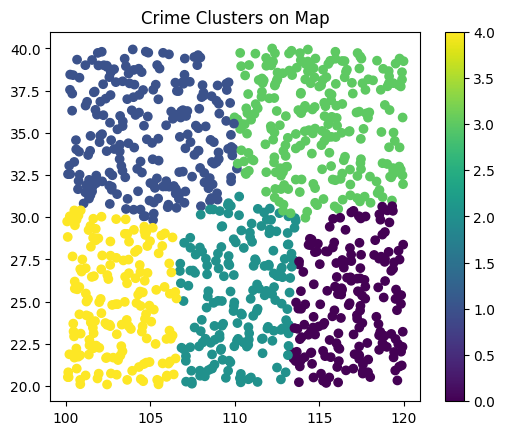

In [128]:
# Plot the clusters on the map
gdf['Cluster'] = crime_data_cleaned['Cluster']
gdf.plot(column='Cluster', legend=True)
plt.title('Crime Clusters on Map')
plt.show()

### Step 5: Predictive Modeling (Time-Series)

In [129]:
# Simple time-series analysis for predicting crime count trends
crime_data_cleaned.set_index('Date', inplace=True)
crime_by_date = crime_data_cleaned.resample('M').size()  # Resample by month

C:\Users\VISHRUT\AppData\Local\Temp\ipykernel_16784\522994359.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  crime_by_date = crime_data_cleaned.resample('M').size()  # Resample by month


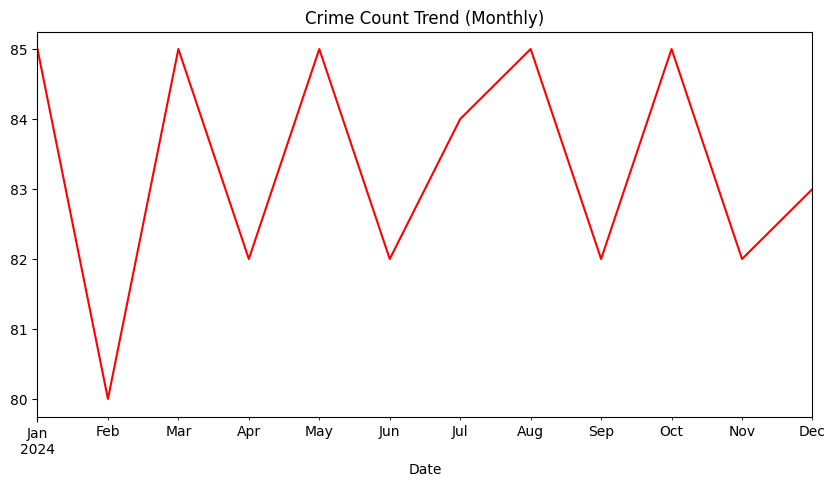

In [130]:
# Plot the time series
crime_by_date.plot(title='Crime Count Trend (Monthly)', figsize=(10, 5), color='red')
plt.show()

### Step 6: Weapon Usage Analysis

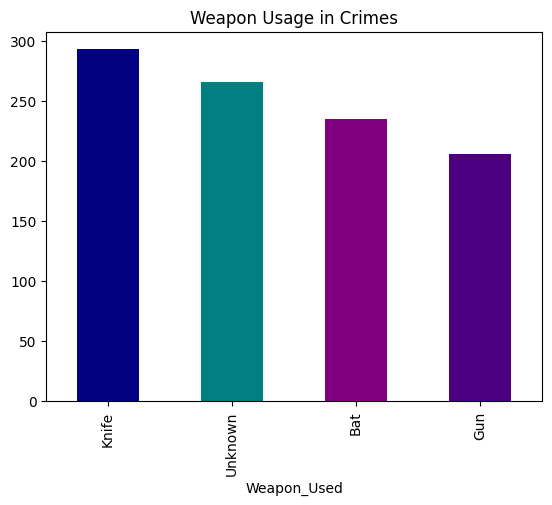

In [131]:
# Analyze the most common weapons used in crimes
weapon_counts = crime_data_cleaned['Weapon_Used'].value_counts()
colors = ['navy', 'teal', 'purple', 'indigo']
weapon_counts.plot(kind='bar', title='Weapon Usage in Crimes', color=colors)
plt.show()

### Step 7: Crime Type Prediction (Logistic Regression)

In [132]:
# Import the necessary module for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [133]:
# Create a simple feature set for demonstration (e.g., latitude, longitude, time of day, suspect age)
features = crime_data_cleaned[['Latitude', 'Longitude', 'Suspect_Age']]
features['Hour'] = pd.to_datetime(crime_data_cleaned['Time'], format='%H:%M').dt.hour


C:\Users\VISHRUT\AppData\Local\Temp\ipykernel_16784\2263646698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Hour'] = pd.to_datetime(crime_data_cleaned['Time'], format='%H:%M').dt.hour


In [134]:
# Target: Crime_Type (binary for simplicity, you can extend to multi-class)
target = crime_data_cleaned['Crime_Type'].apply(lambda x: 1 if x == 'Burglary' else 0)


In [135]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [136]:
# Train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [137]:
# Make predictions
y_pred = logreg.predict(X_test)


In [138]:
# Classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       237
           1       1.00      0.00      0.00        63

    accuracy                           0.79       300
   macro avg       0.90      0.50      0.44       300
weighted avg       0.83      0.79      0.70       300



In [147]:
# Now that we have the correct dataset uploaded, let's load it and add the new 'Crime_Image_URL' column.

# Load the dataset
file_path = 'D:\VIT\Data_Engeering\downloads\china_crime_sample_data_1000.xlsx'
crime_data_extended = pd.read_excel(file_path)

# Adding a new column for sample crime image URLs
crime_images = ['https://sampleurl.com/crime_image_{}.jpg'.format(i) for i in range(1, len(crime_data_extended) + 1)]

# Adding the 'Crime_Image_URL' column to the dataset
crime_data_extended['Crime_Image_URL'] = crime_images

# Save the updated dataset with the image URL column
file_path_with_images = "D:/VIT/Data_Engeering/downloads/china_crime_sample_data_1000_with_images.xlsx"
crime_data_extended.to_excel(file_path_with_images, index=False)

file_path_with_images  # Returning the path to the updated file with the new column.



'D:/VIT/Data_Engeering/downloads/china_crime_sample_data_1000_with_images.xlsx'

In [148]:
pd.read_excel('D:\VIT\Data_Engeering\downloads\china_crime_sample_data_1000_with_images.xlsx')

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude,Crime_Image_URL
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Unknown,27.490802,103.702659,https://sampleurl.com/crime_image_1.jpg
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Unknown,39.014286,110.838019,https://sampleurl.com/crime_image_2.jpg
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Unknown,34.639879,117.458917,https://sampleurl.com/crime_image_3.jpg
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498,https://sampleurl.com/crime_image_4.jpg
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,NaN,23.120373,116.131223,https://sampleurl.com/crime_image_5.jpg
...,...,...,...,...,...,...,...,...,...,...,...
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Unknown,21.831641,113.139103,https://sampleurl.com/crime_image_996.jpg
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Unknown,38.346272,119.132292,https://sampleurl.com/crime_image_997.jpg
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,NaN,22.736373,101.379160,https://sampleurl.com/crime_image_998.jpg
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,NaN,39.004747,101.141094,https://sampleurl.com/crime_image_999.jpg
